In [1]:
import os
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bank_Churn.csv')
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data exploration and EDA

In [4]:
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")

The dataset has 10000 rows and 13 columns.


#### Missing value check

In [6]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

###### from the above result, the dataset has no missing values

#### Check for duplicate values

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
for column in df.columns:
    print(f"******************** {column} ********************")
    print()
    print(set(df[column].tolist()))
    print()

******************** CustomerId ********************

{15695872, 15794178, 15794187, 15630349, 15597591, 15630363, 15794204, 15728669, 15663134, 15597602, 15597610, 15728683, 15761453, 15728693, 15663161, 15663164, 15695932, 15794236, 15663168, 15630402, 15728706, 15761477, 15728709, 15794253, 15630413, 15761487, 15794257, 15630419, 15761497, 15794266, 15663194, 15794273, 15761506, 15794276, 15794278, 15761525, 15794297, 15663234, 15630466, 15728773, 15597709, 15663249, 15761554, 15794323, 15663252, 15663263, 15794345, 15597739, 15630511, 15696047, 15794356, 15696054, 15728823, 15794360, 15696061, 15663294, 15728829, 15761600, 15728838, 15761606, 15663312, 15630551, 15794396, 15696098, 15794413, 15794414, 15630580, 15728885, 15761654, 15696120, 15630592, 15761670, 15728906, 15696141, 15728912, 15728917, 15630617, 15663386, 15761692, 15794468, 15794472, 15761706, 15794479, 15696175, 15761713, 15663410, 15630641, 15761717, 15761720, 15794493, 15663421, 15597885, 15728963, 15630661, 15761

###### Surname of a person doesn't impact whether they will leave or stay with the bank.

In [13]:
# Delete 'surname' column
df.drop(columns = ['Surname'], inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


#### Distibution of continuous features

Distribution plot of continuous features



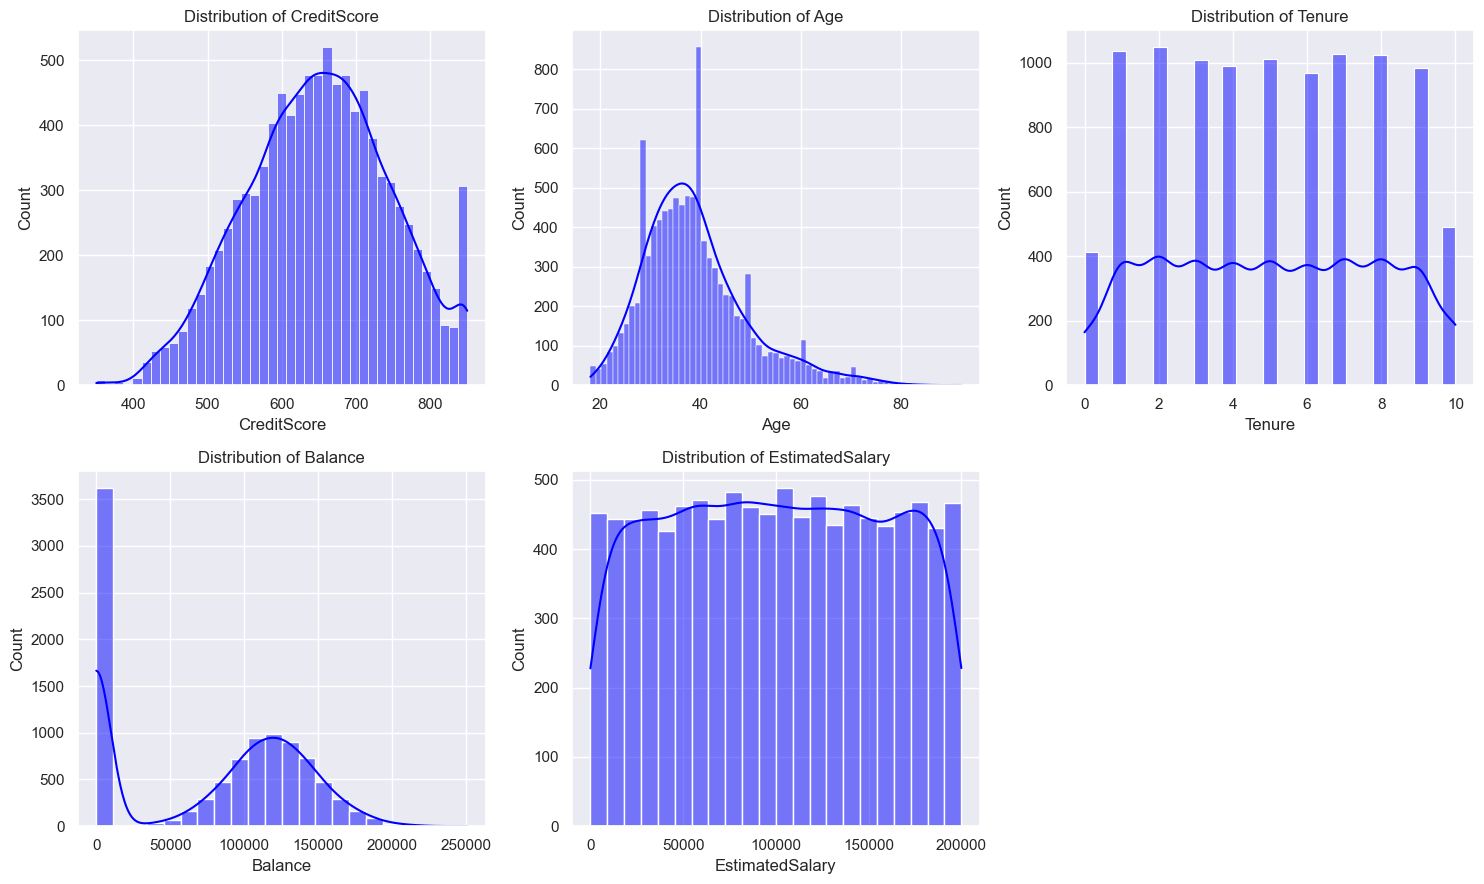

Distribution of Customers by Geography, Gender and Exited



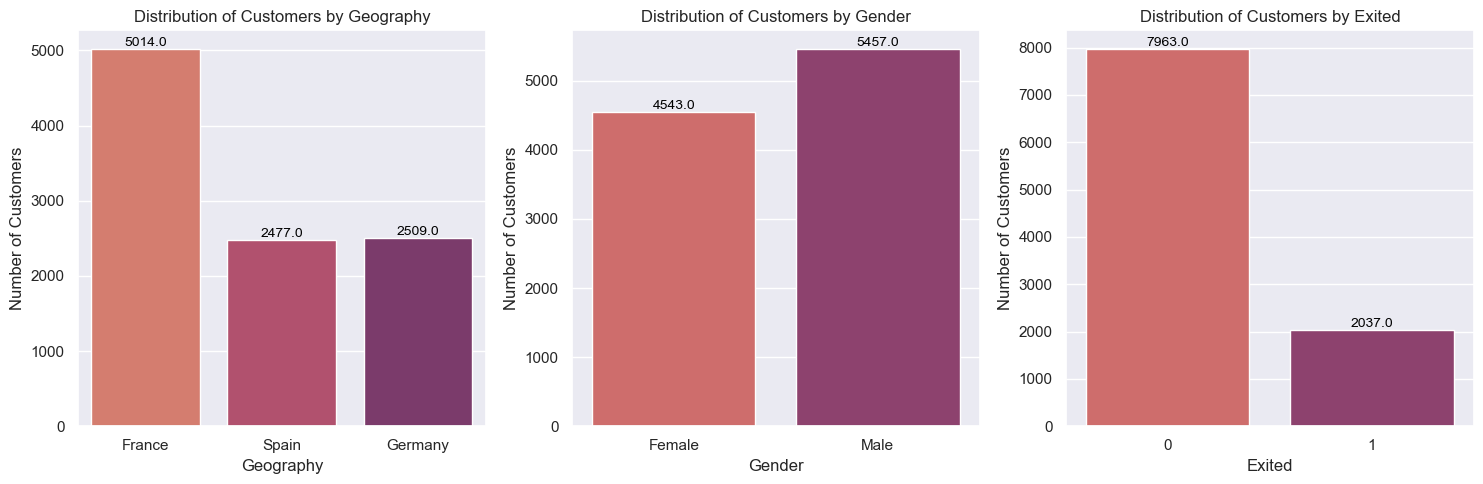

In [16]:
print('Distribution plot of continuous features')
print()
continuous_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
plt.figure(figsize=(15, 9))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, color = 'blue',palette = 'dark:#5A9_r')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


#Countplot-----
print('Distribution of Customers by Geography, Gender and Exited')
print()
countplot_data = ['Geography', 'Gender', 'Exited']
plt.figure(figsize=(15, 5))
for i, col in enumerate(countplot_data):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x= col, data=df, palette = 'flare')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black')
    plt.title(f'Distribution of Customers by {col}')
    plt.xlabel(f"{col}")
    plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [17]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_features:
    print(f"\nUnique values and counts for {df[col].value_counts()}")


Unique values and counts for Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Unique values and counts for Gender
Male      5457
Female    4543
Name: count, dtype: int64

Unique values and counts for HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Unique values and counts for IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Unique values and counts for Exited
0    7963
1    2037
Name: count, dtype: int64


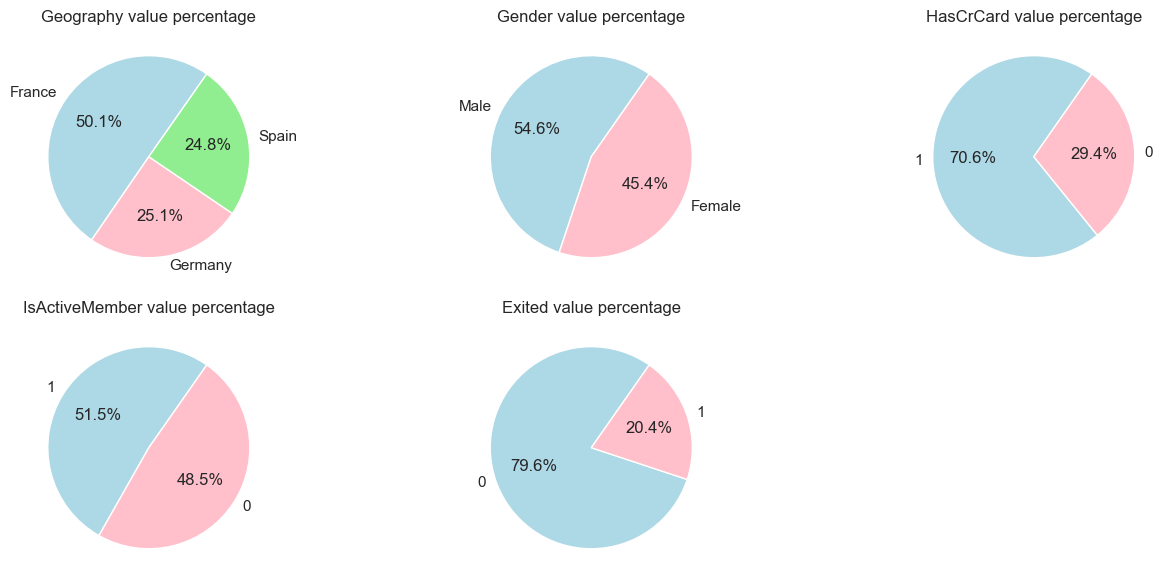

In [18]:
# Pie chart
plt.figure(figsize = (14,6))
for i,col in enumerate(categorical_features):
    plt.subplot(2,3,i+1)
    color = ['lightblue', 'pink','lightgreen']
    counts = df[col].value_counts()
    plt.pie(counts, labels= counts.index,autopct='%1.1f%%', colors= color, startangle=55)
    plt.title(f"{col} value percentage")

plt.tight_layout()
plt.show()

### Boxplots

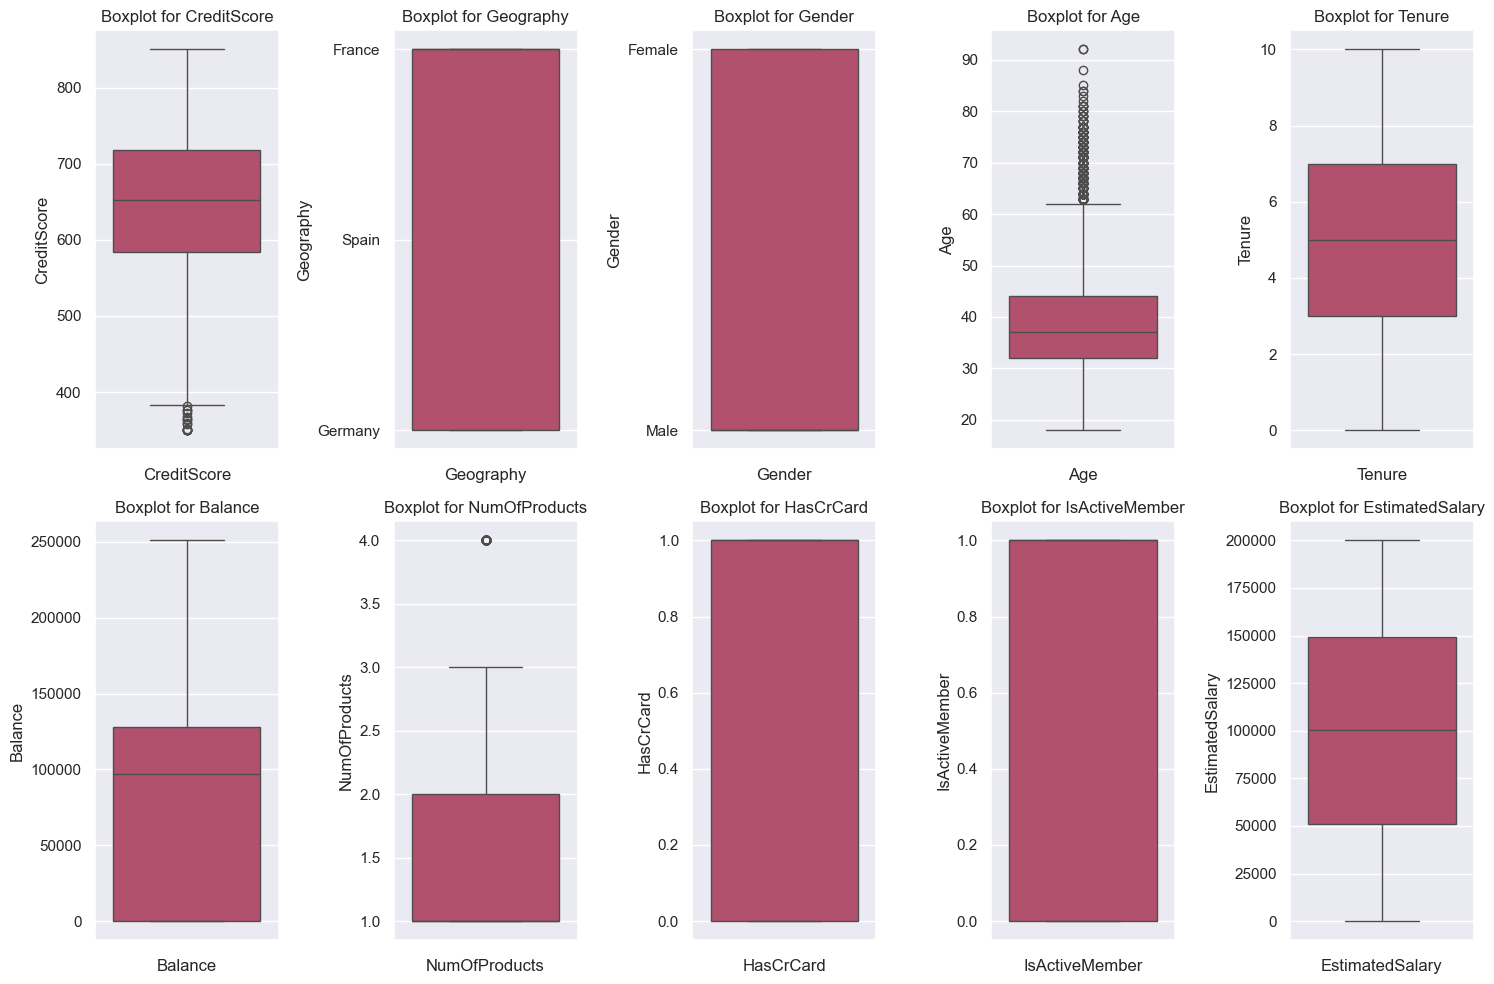

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15,10))
for idx,col in enumerate(df.columns):
    if col != "CustomerId" and col != "Exited":
        axes = axes.flatten()
        i = idx - 1
        sns.boxplot(y = df[col], ax = axes[i], palette = 'flare')
        axes[i].set_title(f"Boxplot for {col}")
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()      

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 



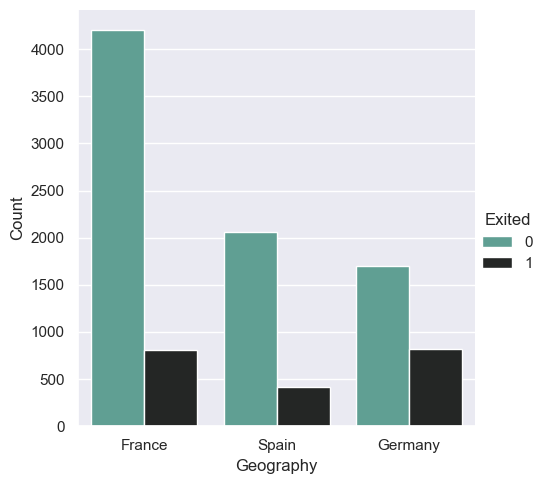

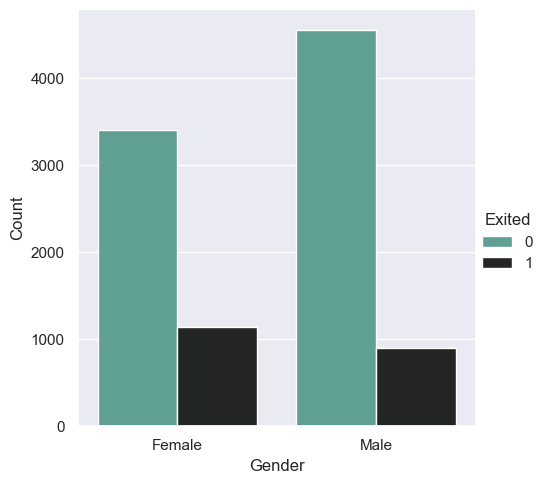

In [21]:
# plot of 'Geography' and 'Gender'
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
for i,column in enumerate(cat_cols):
    print(df[column].value_counts(),"\n")
    sns.catplot(x = column,data = df, kind = "count", hue = 'Exited', palette = "dark:#5A9_r")
    plt.xlabel(column)
    plt.ylabel('Count')
plt.show()

### Pairplot

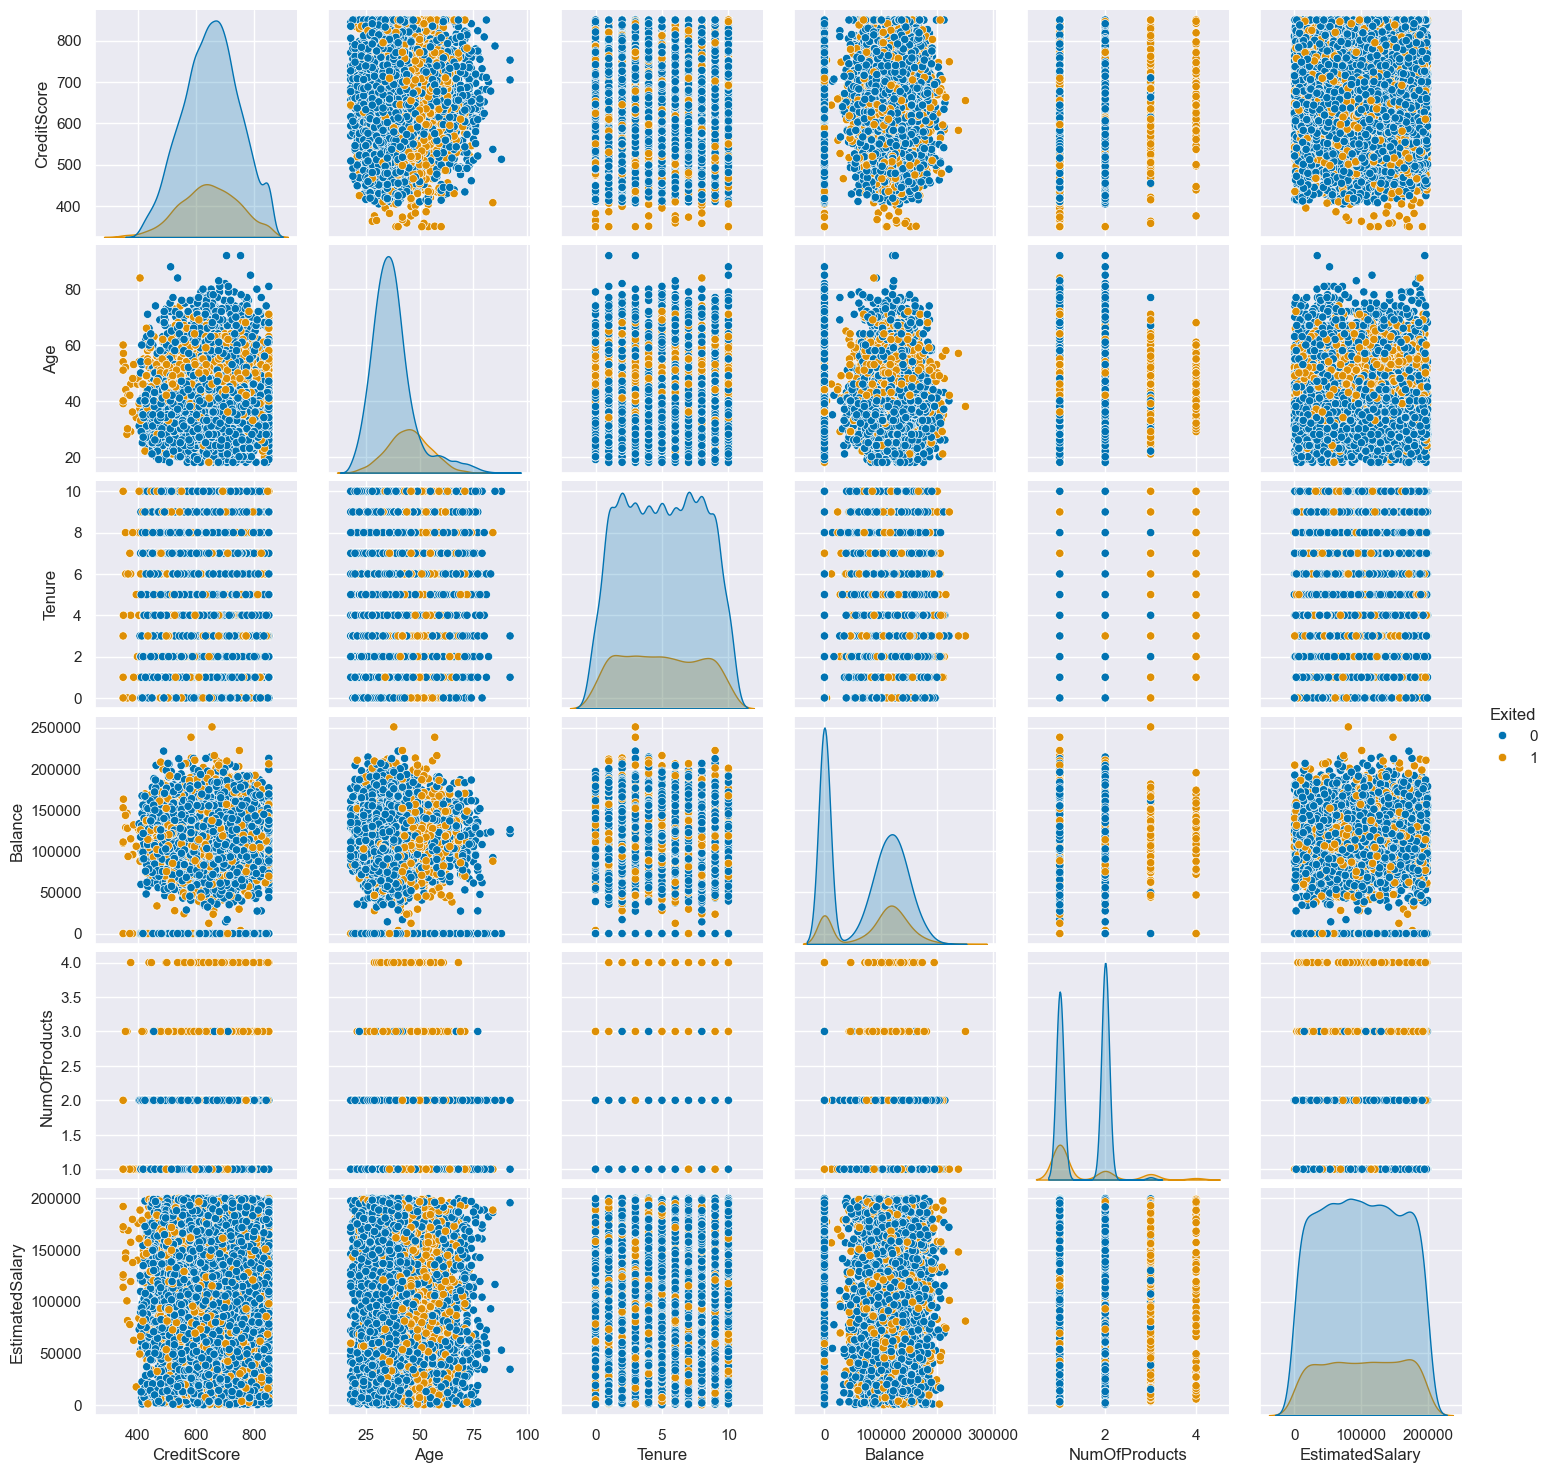

In [23]:
# pairplot_data = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
sns.pairplot(data = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']], hue = 'Exited', palette = 'colorblind')
plt.show()

### Feature Engineering

In [25]:
# Binning continuous features
df['Age_bin'] = pd.cut(df['Age'], bins=5, labels=False)
df['Tenure_bin'] = pd.cut(df['Tenure'], bins=5, labels=False)
df['EstimatedSalary_bin'] = pd.cut(df['EstimatedSalary'], bins=5, labels=False)
df['Balance_bin'] = pd.cut(df['Balance'], bins=5, labels=False)
df['CreditScore_bin'] = pd.cut(df['CreditScore'], bins=5, labels=False)

In [26]:
df['balance_salary_ratio'] = df['Balance']/df['EstimatedSalary']

In [27]:
bin_features = ['Age_bin', 'Tenure_bin', 'EstimatedSalary_bin', 'Balance_bin']

for col in bin_features:
  print(f"\n{df[col].value_counts()}\n")


Age_bin
1    5500
0    2790
2    1351
3     335
4      24
Name: count, dtype: int64


Tenure_bin
0    2496
3    2053
1    1998
2    1979
4    1474
Name: count, dtype: int64


EstimatedSalary_bin
1    2033
2    2029
4    1994
3    1989
0    1955
Name: count, dtype: int64


Balance_bin
2    3828
0    3692
1    1533
3     915
4      32
Name: count, dtype: int64



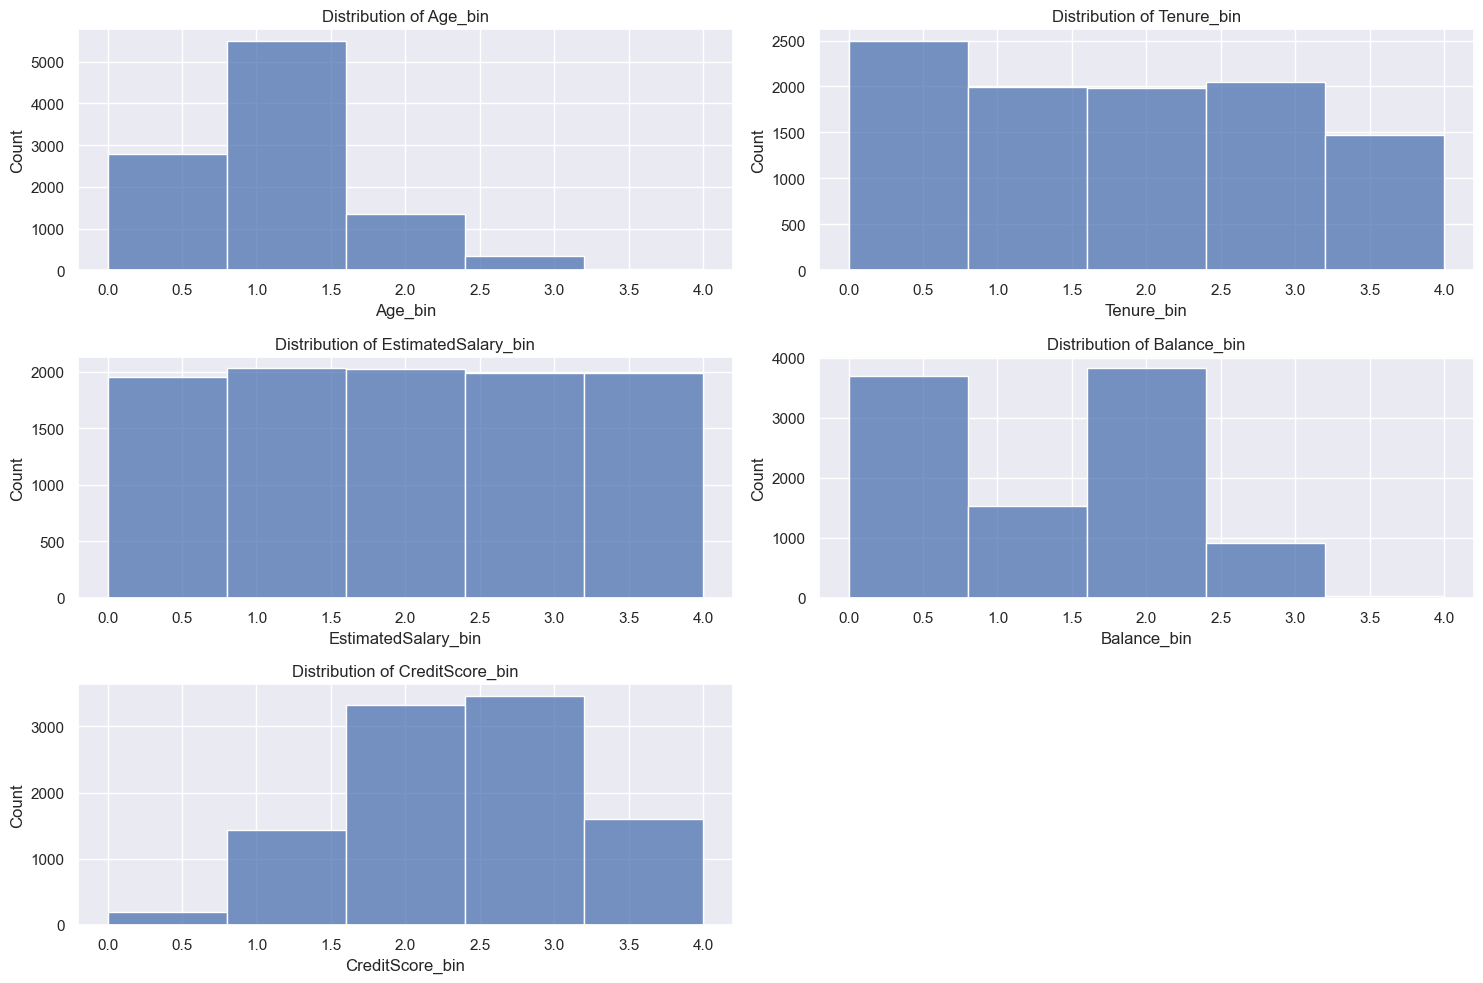

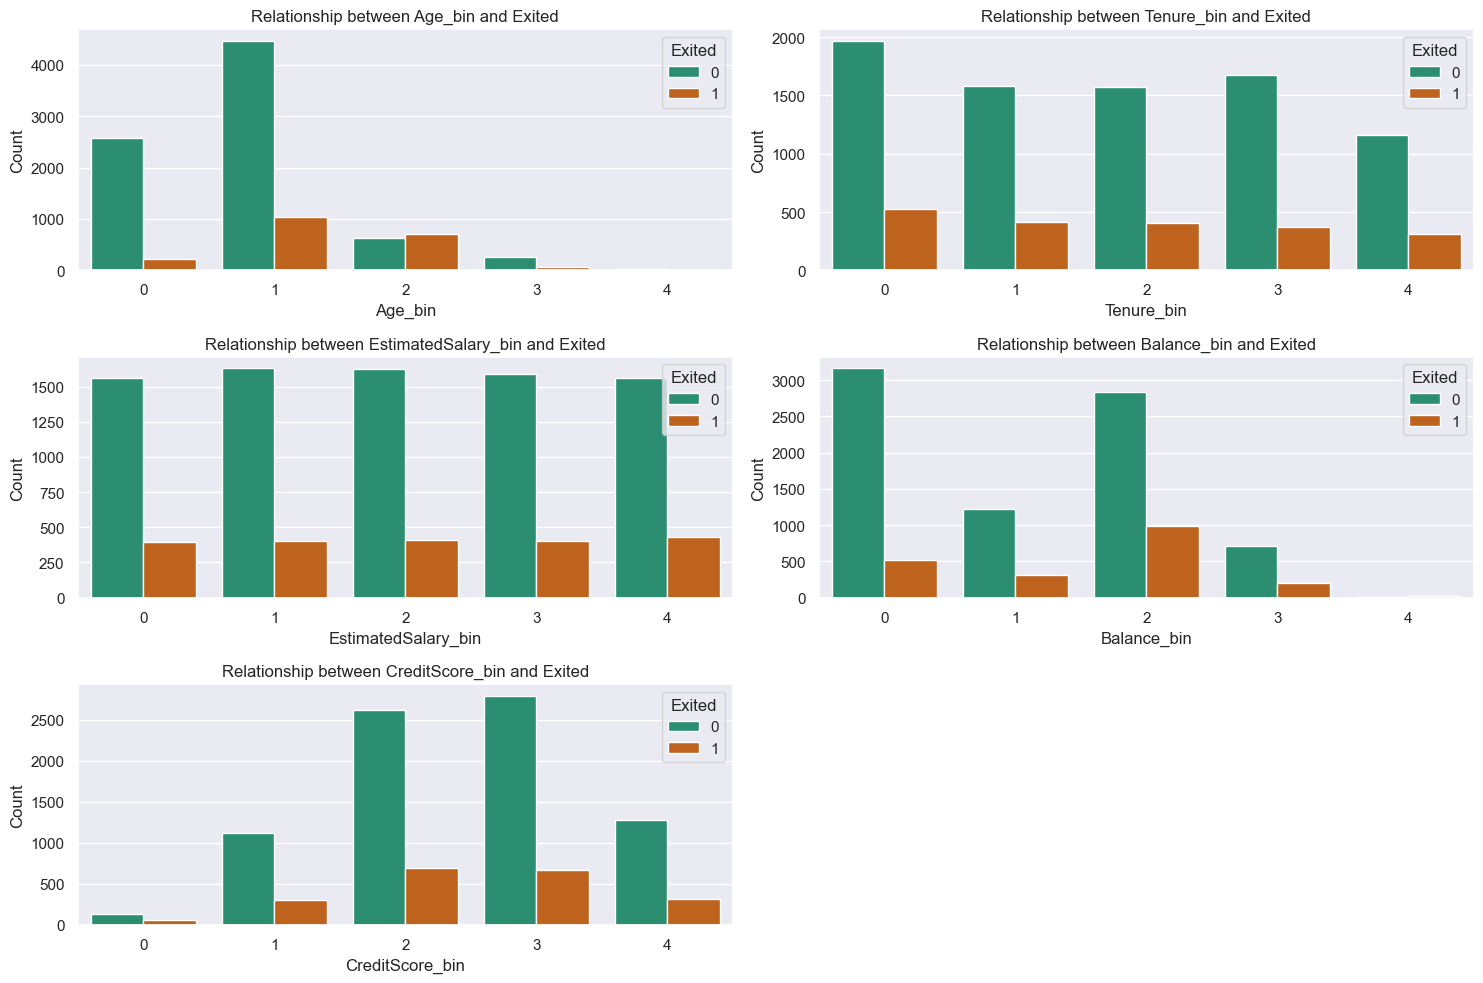

In [28]:
# Histograms for Binned Features
plt.figure(figsize=(15, 10))
bin_features = ['Age_bin', 'Tenure_bin', 'EstimatedSalary_bin', 'Balance_bin', 'CreditScore_bin']
for i, col in enumerate(bin_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], bins=5, kde = False, palette = 'YlGnBu_r')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Relationship between Binned Features and Target Variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(bin_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, hue='Exited', data=df, palette = 'Dark2')
    plt.title(f'Relationship between {col} and Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Convert categorical columns into numerical values

In [30]:
for column in categorical_features:
    if column != 'Exited':
        df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CustomerId            10000 non-null  int64   
 1   CreditScore           10000 non-null  int64   
 2   Geography             10000 non-null  category
 3   Gender                10000 non-null  category
 4   Age                   10000 non-null  int64   
 5   Tenure                10000 non-null  int64   
 6   Balance               10000 non-null  float64 
 7   NumOfProducts         10000 non-null  int64   
 8   HasCrCard             10000 non-null  category
 9   IsActiveMember        10000 non-null  category
 10  EstimatedSalary       10000 non-null  float64 
 11  Exited                10000 non-null  int64   
 12  Age_bin               10000 non-null  int64   
 13  Tenure_bin            10000 non-null  int64   
 14  EstimatedSalary_bin   10000 non-null  int64   
 15  Bal

In [31]:
# Select the categorical columns for OneHotEncoding
cat_columns = df.select_dtypes(include = ['category', 'object']).columns

#OneHotEncoder
encoded_df = pd.get_dummies(df, columns = cat_columns, drop_first = True)

# Rearrange the columns for better view and understanding
cols = [col for col in encoded_df.columns if col != 'Exited']+['Exited']
final_df = encoded_df[cols]

# Convert bool types into integer format
for col in final_df.select_dtypes(include = ['bool']).columns:
  final_df[col] = final_df[col].astype('int')

In [32]:
final_df.head(7)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Age_bin,Tenure_bin,EstimatedSalary_bin,Balance_bin,CreditScore_bin,balance_salary_ratio,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,Exited
0,15634602,619,42,2,0.00,1,101348.88,1,0,2,0,2,0.000000,0,0,0,1,1,1
1,15647311,608,41,1,83807.86,1,112542.58,1,0,2,1,2,0.744677,0,1,0,0,1,0
2,15619304,502,42,8,159660.80,3,113931.57,1,3,2,3,1,1.401375,0,0,0,1,0,1
3,15701354,699,39,1,0.00,2,93826.63,1,0,2,0,3,0.000000,0,0,0,0,0,0
4,15737888,850,43,2,125510.82,1,79084.10,1,0,1,2,4,1.587055,0,1,0,1,1,0
5,15574012,645,44,8,113755.78,2,149756.71,1,3,3,2,2,0.759604,0,1,1,1,0,1
6,15592531,822,50,7,0.00,2,10062.80,2,3,0,0,4,0.000000,0,0,1,1,1,0


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            10000 non-null  int64  
 1   CreditScore           10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Tenure                10000 non-null  int64  
 4   Balance               10000 non-null  float64
 5   NumOfProducts         10000 non-null  int64  
 6   EstimatedSalary       10000 non-null  float64
 7   Age_bin               10000 non-null  int64  
 8   Tenure_bin            10000 non-null  int64  
 9   EstimatedSalary_bin   10000 non-null  int64  
 10  Balance_bin           10000 non-null  int64  
 11  CreditScore_bin       10000 non-null  int64  
 12  balance_salary_ratio  10000 non-null  float64
 13  Geography_Germany     10000 non-null  int32  
 14  Geography_Spain       10000 non-null  int32  
 15  Gender_Male         

##### From the above plot, not much features are having outliers. Only 'Age' feature has outliers which can be considered (Maximum age is 92 years).

In [35]:
final_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Age_bin,Tenure_bin,EstimatedSalary_bin,Balance_bin,CreditScore_bin,balance_salary_ratio,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.930300,1.80110,2.00340,1.206200,2.485100,3.878703,0.250900,0.247700,0.545700,0.70550,0.515100,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.751597,1.39776,1.40783,1.050901,0.984518,108.337260,0.433553,0.431698,0.497932,0.45584,0.499797,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000,1.00000,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,1.000000,2.00000,2.00000,1.000000,3.000000,0.747002,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,1.000000,3.00000,3.00000,2.000000,3.000000,1.514022,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,4.000000,4.00000,4.00000,4.000000,4.000000,10614.655440,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [36]:
final_df.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary', 'Age_bin', 'Tenure_bin',
       'EstimatedSalary_bin', 'Balance_bin', 'CreditScore_bin',
       'balance_salary_ratio', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_1', 'IsActiveMember_1', 'Exited'],
      dtype='object')

In [37]:
final_df.shape

(10000, 19)

### Correlation Matrix

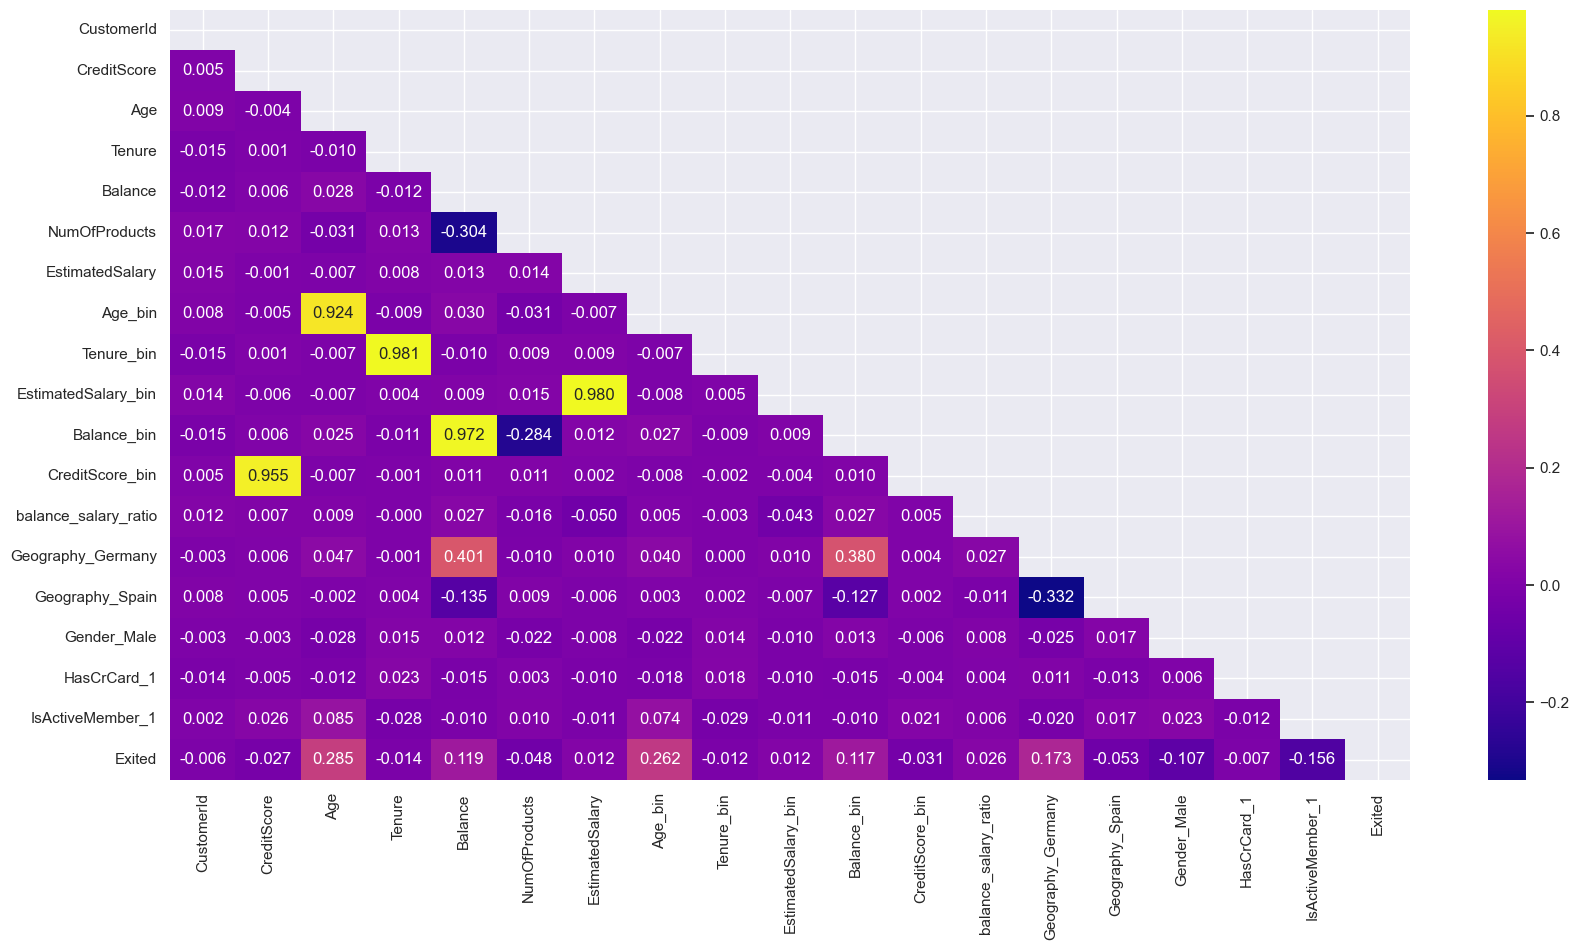

In [39]:
corr_matrix = final_df.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, fmt = '.3f', annot = True,mask = mask, cmap = 'plasma')
plt.show()

### Split the data into independent and dependent set.

In [41]:
x = final_df.iloc[:,:-1]
y = final_df['Exited']

# SMOTE technique to balance the dataset
'''
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_smote, y_smote = smote.fit_resample(x,y)
'''


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101, stratify = y)
#x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 101)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (7000, 18)
y_train shape: (7000,)
x_test shape: (3000, 18)
y_test shape: (3000,)


### Scale all the values into one range (StandardScaler)

In [43]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

## Model Building

In [45]:
# Evaluate multiple models and print their training and test accuracies

models = {'Logistic':LogisticRegression(), 'DTree': DecisionTreeClassifier(), 'Bagging': BaggingClassifier(),
         'Random forest': RandomForestClassifier(), 'Adaboost': AdaBoostClassifier(), 'GradientBoosting': GradientBoostingClassifier(),
         'xgboost': XGBClassifier(), 'KNN': KNeighborsClassifier(), 'svm': SVC(), 'GaussianNB': GaussianNB(), 'BernoulliNB': BernoulliNB()}
def evaluate_model(models, x_train_sc, x_test_sc, y_train, y_test):
    result = []
    for name,model in models.items():
        try:
            model.fit(x_train_sc, y_train)

            y_pred_train = model.predict(x_train_sc)
            y_pred_test = model.predict(x_test_sc)

            train_acc = accuracy_score(y_train, y_pred_train)
            test_acc = accuracy_score(y_test, y_pred_test)

            result.append({"Model": name,
                          "Training Accuracy": train_acc, 
                          "Test Accuracy": test_acc})

        except Exception as e:
            # Handle errors if any model fails during fitting or prediction
            print(f"Error with model {name}: {e}")
            result.append({
                'Model': name,
                'Training Accuracy': 'Error',
                'Test Accuracy': 'Error'
            })
    result_df = pd.DataFrame(result)
    return result_df


In [46]:
acc_df = evaluate_model(models, x_train_sc, x_test_sc, y_train, y_test)
for col in acc_df.columns:
    if col != 'Model':
        acc_df[col] = np.round((acc_df[col].values * 100),2)
acc_df = acc_df.sort_values(by = 'Test Accuracy', ascending = False)
acc_df

,Model,Training Accuracy,Test Accuracy
5,GradientBoosting,87.73,86.03
3,Random forest,100.00,85.93
8,svm,86.64,85.60
6,xgboost,97.81,85.07
4,Adaboost,86.31,84.63
2,Bagging,98.30,84.27
7,KNN,86.81,82.57
0,Logistic,81.13,80.43
9,GaussianNB,80.47,80.00
10,BernoulliNB,79.66,79.50


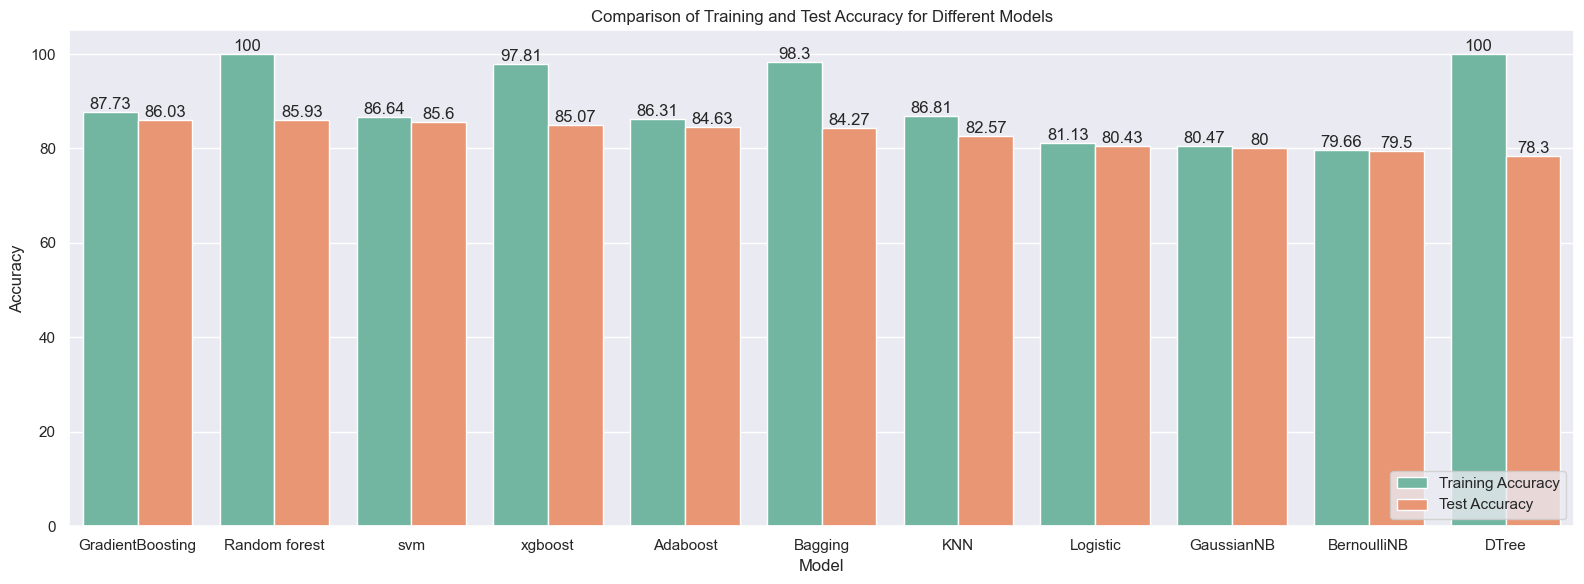

In [47]:
## Accuracy plot----

df_melted = acc_df.melt(id_vars='Model', value_vars= ['Training Accuracy', 'Test Accuracy'], var_name= 'Metrics',
                               value_name= "Accuracy")

plt.figure(figsize = (16,6))
ax = sns.barplot(x = 'Model', y = 'Accuracy', hue = 'Metrics', data = df_melted, palette = "Set2")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Comparison of Training and Test Accuracy for Different Models')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

#### From the above plot, gradient boosting model yields good result in both training and test set. 

## Gradient Boosting Model 

In [50]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train_sc, y_train)

GradientBoostingClassifier()

In [51]:
y_pred_grad_tr = gradient.predict(x_train_sc)
y_pred_grad_te = gradient.predict(x_test_sc)

### Feature Importance

In [53]:
feature_importance = gradient.feature_importances_
feature_importance

array([8.33589861e-03, 1.84492010e-02, 3.86590040e-01, 3.24434234e-03,
       4.38284858e-02, 3.18477058e-01, 1.28527797e-02, 1.97010427e-03,
       1.79370219e-03, 2.35109178e-04, 1.00837307e-03, 6.01526808e-04,
       3.35780847e-02, 4.73580862e-02, 4.12158450e-04, 1.50472103e-02,
       5.46015137e-04, 1.05671824e-01])

In [54]:
feature_names = x.columns
feature_importance_df = pd.DataFrame({"Features":feature_names, "Importances":feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importances', ascending = False)
feature_importance_df

,Features,Importances
2,Age,0.386590
5,NumOfProducts,0.318477
17,IsActiveMember_1,0.105672
13,Geography_Germany,0.047358
4,Balance,0.043828
12,balance_salary_ratio,0.033578
1,CreditScore,0.018449
15,Gender_Male,0.015047
6,EstimatedSalary,0.012853
0,CustomerId,0.008336


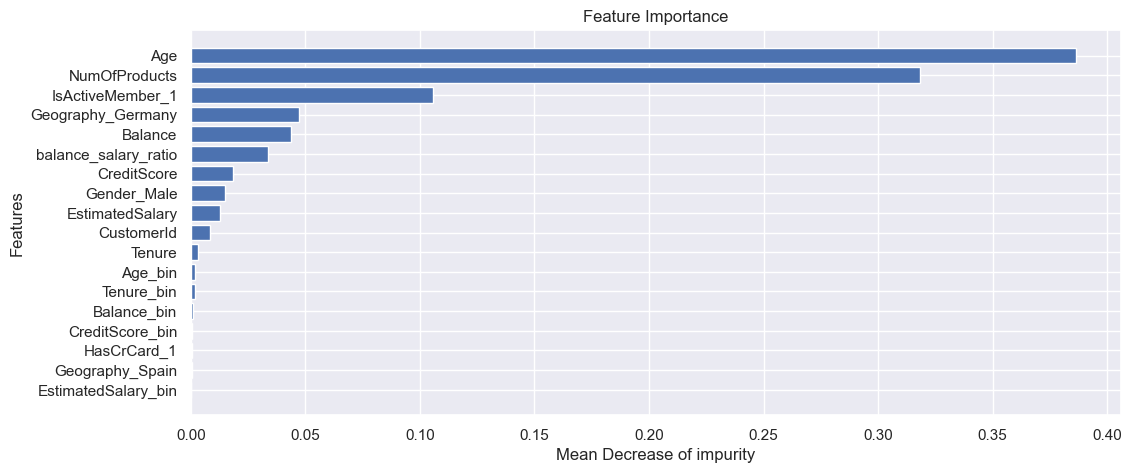

In [55]:
plt.figure(figsize  = (12,5))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importances'])
plt.gca().invert_yaxis()
plt.xlabel("Mean Decrease of impurity")
plt.ylabel("Features")
plt.title('Feature Importance')
plt.show()


In [56]:
gradient.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [57]:
parameters = {'learning_rate': [0.1,0.01,0.001],
              'max_depth': [3,5,8,10,12],
              'n_estimators': [100,200,300]}

### Hyper-Parameter Tunning (GridSearchCV)

In [59]:
grid = GridSearchCV(estimator= gradient, param_grid = parameters, scoring = 'accuracy', cv = 2)
grid.fit(x_train_sc, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [60]:
print(f"The best accuracy after hyperparameter tunning: {grid.best_score_}")

The best accuracy after hyperparameter tunning: 0.8635714285714285


In [61]:
print(f"The best parameter after hyperparameter tunning: {grid.best_params_}")

The best parameter after hyperparameter tunning: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [62]:
gradient_tuned = gradient.set_params(learning_rate = 0.1, max_depth = 3, n_estimators = 100)
gradient_tuned.fit(x_train_sc, y_train)

GradientBoostingClassifier()

In [63]:
y_pred_train = gradient_tuned.predict(x_train_sc)
y_pred_test = gradient_tuned.predict(x_test_sc)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training accuracy after hyperparameter tunning: {train_acc}")
print()
print(f"Test accuracy after hyperparamter tunning: {test_acc}")

Training accuracy after hyperparameter tunning: 0.8772857142857143

Test accuracy after hyperparamter tunning: 0.8603333333333333


##### Not very singnificant change in the test accuracy after hyper-parameter tunning.

### Confusion Matrix

In [66]:
cm_train = confusion_matrix(y_train, y_pred_grad_tr)
cm_test = confusion_matrix(y_test, y_pred_grad_te)

tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

print("True Negative on training set:", tn_train)
print()
print("False positivr on training set:", fp_train)
print()
print("False Negative on training set:", fn_train)
print()
print("True positive on training set:", tp_train)
print("_____________________________________________")
print()
print("True Negative on test set:", tn_test)
print()
print("False positive on test set:", fp_test)
print()
print("False Negative on test set:", fn_test)
print()
print("True positive on test set:", tp_test)

True Negative on training set: 5402

False positivr on training set: 172

False Negative on training set: 687

True positive on training set: 739
_____________________________________________

True Negative on test set: 2319

False positive on test set: 70

False Negative on test set: 349

True positive on test set: 262


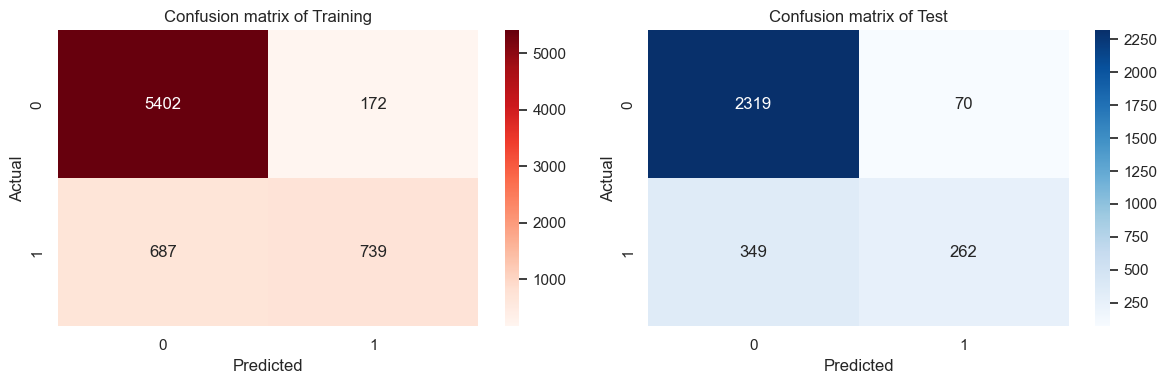

In [67]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
# plot of train confusion matrix
sns.heatmap(cm_train, annot= True, cmap= 'Reds', fmt = 'd', ax = axes[0], )
axes[0].set_title("Confusion matrix of Training")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
# plot of test confusion matrix
sns.heatmap(cm_test, annot= True, cmap= 'Blues', fmt = 'd', ax = axes[1])
axes[1].set_title("Confusion matrix of Test")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()

plt.show()

### Cross Validation (K-fold)

In [69]:
train_gdb = cross_val_score(gradient, x_train_sc, y_train, cv = 10)
test_gdb = cross_val_score(gradient, x_test_sc, y_test, cv = 10)

In [70]:
print('Result after 10 times cross validation: \n')
print(f"Training accuracy in each iteration \n: {train_gdb}")

print(f'Test accuracy in each iteration \n: {test_gdb}')
print('*************************************************************')
print(f'Maximum training accuracy : {np.round((train_gdb.max() * 100),2)}')
print(f"Maximum test accuracy: {np.round((test_gdb.max() * 100), 2)}")
print('*************************************************************')
print(f'Mean training accuracy : {np.round((train_gdb.mean() * 100),2)}')
print(f"Mean test accuracy: {np.round((test_gdb.mean() * 100), 2)}")

Result after 10 times cross validation: 

Training accuracy in each iteration 
: [0.85142857 0.85714286 0.85142857 0.87142857 0.86714286 0.88285714
 0.85285714 0.85714286 0.89142857 0.85857143]
Test accuracy in each iteration 
: [0.84333333 0.86666667 0.85333333 0.85333333 0.85       0.86333333
 0.86       0.85666667 0.85333333 0.86333333]
*************************************************************
Maximum training accuracy : 89.14
Maximum test accuracy: 86.67
*************************************************************
Mean training accuracy : 86.41
Mean test accuracy: 85.63


### Classification Report

In [72]:
print("Classification Report of test set: \n")
print(classification_report(y_test, y_pred_grad_te))

Classification Report of test set: 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.79      0.43      0.56       611

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



#### Macro Average: Calculates metrics for each class independently and then takes the average. It treats all classes equally, regardless of their support (number of instances).

##### Precision: 0.82

##### Recall: 0.69

##### F1-Score: 0.73

#### Weighted Average: Calculates metrics for each class, but weighs them by their support. This gives more importance to the performance on the more frequent class.

##### Precision: 0.85

##### Recall: 0.86

##### F1-Score: 0.84

### Key observations

##### (i), The model performs well on class 0 (high precision and recall).

##### (ii), For class 1, recall is low (0.42), indicating many false negatives. This might be problematic if class 1 is critical.

##### (iii), The weighted average is higher than the macro average, indicating the model performs better on the more frequent class (0).

##### (iv), High accuracy (86%) might be misleading due to class imbalance (more instances of class 0).

### ROC AUC Curve

In [76]:
gdb_roc_auc_score = roc_auc_score(y_test, y_pred_grad_te)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grad_te)

print(f"ROC-AUC Score :\n {gdb_roc_auc_score}")
print(f"False postive rate:\n {fpr} \n True positive rate: \n {tpr} \n Threshold value: \n {thresholds}")

ROC-AUC Score :
 0.6997521372849783
False postive rate:
 [0.         0.02930096 1.        ] 
 True positive rate: 
 [0.         0.42880524 1.        ] 
 Threshold value: 
 [2 1 0]


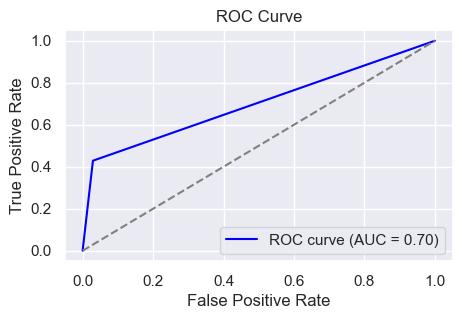

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grad_te)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()